# Why do we need Word Embeddings?

Many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications. Some real world applications of text applications are – sentiment analysis of reviews by Amazon etc., document or news classification or clustering by Google etc.


Image and audio processing systems work with rich, high-dimensional datasets encoded as vectors of the individual raw pixel-intensities for image data, or e.g. power spectral density coefficients for audio data. For tasks like object or speech recognition we know that all the information required to successfully perform the task is encoded in the data (because humans can perform these tasks from the raw data). However, natural language processing systems traditionally treat words as discrete atomic symbols, and therefore 'cat' may be represented as Id537 and 'dog' as Id143. These encodings are arbitrary, and provide no useful information to the system regarding the relationships that may exist between the individual symbols. This means that the model can leverage very little of what it has learned about 'cats' when it is processing data about 'dogs' (such that they are both animals, four-legged, pets, etc.). Representing words as unique, discrete ids furthermore leads to data sparsity, and usually means that we may need more data in order to successfully train statistical models. Using vector representations can overcome some of these obstacles

<img src='assets/need-4-w2vec.png'>

# What are Word Embeddings?

In very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text. 

A Word Embedding format generally tries to map a word using a dictionary to a vector.

A word in this sentence may be “Embeddings” or “numbers ” etc.

A dictionary may be the list of all unique words in the sentence. So, a dictionary may look like – [‘Word’,’Embeddings’,’are’,’Converted’,’into’,’numbers’]

A vector representation of a word may be a one-hot encoded vector where 1 stands for the position where the word exists and 0 everywhere else. 

The vector representation of “numbers” in this format according to the above dictionary is [0,0,0,0,0,1] and of converted is[0,0,0,1,0,0].

Let us look at different types of Word Embeddings or Word Vectors and their advantages and disadvantages over the rest.

### Different types of Word Embeddings
The different types of word embeddings can be broadly classified into two categories-

* Frequency based Embedding
* Prediction based Embedding

Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model).

## Frequency based Embedding
There are generally three types of vectors that we encounter under this category.

* Count Vector
* TF-IDF Vector
* Co-Occurrence Vector

#### count-vector 

D1: He is a lazy boy. She is also lazy.

D2: Neeraj is a lazy person.

The dictionary created may be a list of unique tokens(words) in the corpus =[‘He’,’She’,’lazy’,’boy’,’Neeraj’,’person’]

The count matrix M of size 2 X 6 will be represented as –

        He	She	lazy	boy	Neeraj	person
    D1	1	1	2	1	0	0
    D2	0	0	1	0	1	1

<img src='assets/doc-n-word-vec.png'>

#### TF-IDF vectorization

Based on the frequency method but it is different to the count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus. 

Common words like ‘is’, ‘the’, ‘a’ etc. tend to appear quite frequently in comparison to the words which are important to a document. For example, a document A on Lionel Messi is going to contain more occurences of the word “Messi” in comparison to other documents. But common words like “the” etc. are also going to be present in higher frequency in almost every document.

Ideally, what we would want is to down weight the common words occurring in almost all documents and give more importance to words that appear in a subset of documents.

TF-IDF works by penalising these common words by assigning them lower weights while giving importance to words like Messi in a particular document.

Consider the below sample table which gives the count of terms(tokens/words) in two documents.

<img src='assets/Tf-IDF.png'>

TF = (Number of times term t appears in a document)/(Number of terms in the document)

So, TF(This,Document1) = 1/8

TF(This, Document2)=1/5

It denotes the contribution of the word to the document i.e words relevant to the document should be frequent. eg: A document about Messi should contain the word ‘Messi’ in large number.

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

where N is the number of documents and n is the number of documents a term t has appeared in.

So, IDF(This) = log(2/2) = 0.

So, how do we explain the reasoning behind IDF? Ideally, if a word has appeared in all the document, then probably that word is not relevant to a particular document. But if it has appeared in a subset of documents then probably the word is of some relevance to the documents it is present in.

Let us compute IDF for the word ‘Messi’.

IDF(Messi) = log(2/1) = 0.301.

Now, let us compare the TF-IDF for a common word ‘This’ and a word ‘Messi’ which seems to be of relevance to Document 1.

TF-IDF(This,Document1) = (1/8) * (0) = 0

TF-IDF(This, Document2) = (1/5) * (0) = 0

TF-IDF(Messi, Document1) = (4/8)*0.301 = 0.15

As, you can see for Document1 , TF-IDF method heavily penalises the word ‘This’ but assigns greater weight to ‘Messi’. So, this may be understood as ‘Messi’ is an important word for Document1 from the context of the entire corpus.

#### Co-Occurrence Matrix with a fixed context window

The big idea – Similar words tend to occur together and will have similar context for example – Apple is a fruit. Mango is a fruit.
Apple and mango tend to have a similar context i.e fruit.

co-occurrence – For a given corpus, the co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window.

Context Window – Context window is specified by a number and the direction. So what does a context window of 2 (around) means? Let us see an example below : 

example corpus to calculate a co-occurrence matrix.

Corpus = "He is not lazy. He is intelligent. He is smart."

<img src="assets/co-occ-matrix.png">

Red box- It is the number of times ‘He’ and ‘is’ have appeared in the context window 2 and it can be seen that the count turns out to be 4. The below table will help you visualise the count.

<img src="assets/occurance-explained.png">


## Prediction based Vector

So far, we have seen deterministic methods to determine word vectors. But these methods proved to be limited in their word representations until Mitolov etc. el introduced ***word2vec*** to the NLP community. These methods were prediction based in the sense that they provided probabilities to the words and proved to be state of the art for tasks like word analogies and word similarities. 

<img src="assets/word2vec-king-queen-vectors.png">
<img src="assets/word-2-vec-analogy.png">


## How word2vec works:


The idea behind word2vec is that:

* Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
* Feed it a word and train it to predict its neighbouring word.
* Remove the last (output layer) and keep the input and hidden layer.
* Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.

Contrary to popular belief, word2vec is not a deep network, it only has 3 layers!

Word2vec is a particularly computationally-efficient predictive model for learning word embeddings from raw text. It comes in two flavors, the Continuous Bag-of-Words model (CBOW) and the Skip-Gram model (Section 3.1 and 3.2 in Mikolov et al.). Algorithmically, these models are similar, except that CBOW predicts target words (e.g. 'mat') from source context words ('the cat sits on the'), while the skip-gram does the inverse and predicts source context-words from the target words. 

 This inversion might seem like an arbitrary choice, but statistically it has the effect that CBOW smoothes over a lot of the distributional information (by treating an entire context as one observation). For the most part, this turns out to be a useful thing for smaller datasets. However, skip-gram treats each context-target pair as a new observation, and this tends to do better when we have larger datasets. We will focus on the skip-gram model in the rest of this tutorial.

## Input 

This is the raw text on which we will be working on:

In [2]:
import numpy as np
import tensorflow as tf
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()

## conversion into x,y labels 

We Need to convert this to an input output pair such that if we input a word, it should it predict that the neighbouring words : the n words before and after it, where n is the parameter window_size

<img src="assets/input_output_pair.png">
    
Note: If the word is at the beginning or ending of sentence, the window ignores the outer words.

Before doing this, we will create a dictionary which translates words to integers and integers to words.This will be used for all future mappings.


In [4]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word


In [99]:
len(words)

7

In [9]:
word2int['queen'],int2word[3]

(3, 'queen')

In [5]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [6]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


Now, we will generate our training data:

In [11]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [101]:
print(data)
print(len(data))

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]
34


We have our training data. But it needs to be represented in a way a computer can understand i.e., with numbers. That’s where our word2int dict comes handy.

Let’s go one step further and convert these numbers into one hot vectors.



In [14]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [15]:
print(x_train)

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [16]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


In [102]:
# Make the tensorflow model
vocab_size

7

In [103]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [105]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [106]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

input_one_hot  --->  embedded repr. ---> predicted_neighbour_prob

predicted_prob will be compared against a one hot vector to correct it.

In [110]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 15000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  3.8816888
loss is :  3.6446817
loss is :  3.4436176
loss is :  3.2741506
loss is :  3.1318204
loss is :  3.0118937
loss is :  2.9097056
loss is :  2.8211977
loss is :  2.743234
loss is :  2.6735797
loss is :  2.6106963
loss is :  2.5535107
loss is :  2.5012395
loss is :  2.4532723
loss is :  2.4091084
loss is :  2.368316
loss is :  2.3305175
loss is :  2.2953775
loss is :  2.2625985
loss is :  2.2319188
loss is :  2.2031076
loss is :  2.1759646
loss is :  2.150317
loss is :  2.126016
loss is :  2.1029341
loss is :  2.0809634
loss is :  2.060011
loss is :  2.0399978
loss is :  2.0208566
loss is :  2.0025294
loss is :  1.9849663
loss is :  1.9681246
loss is :  1.951966
loss is :  1.9364573
loss is :  1.9215688
loss is :  1.9072737
loss is :  1.8935478
loss is :  1.8803682
loss is :  1.8677145
loss is :  1.8555669
loss is :  1.8439063
loss is :  1.8327152
loss is :  1.8219757
loss is :  1.8116715
loss is :  1.8017855
loss is :  1.7923018
loss is :  1.7832038
loss is :  1.774475

loss is :  1.3595724
loss is :  1.3594875
loss is :  1.3594028
loss is :  1.3593185
loss is :  1.3592343
loss is :  1.3591505
loss is :  1.3590668
loss is :  1.3589832
loss is :  1.3589001
loss is :  1.3588171
loss is :  1.3587345
loss is :  1.3586519
loss is :  1.3585697
loss is :  1.3584877
loss is :  1.3584061
loss is :  1.3583245
loss is :  1.3582431
loss is :  1.3581623
loss is :  1.3580815
loss is :  1.3580009
loss is :  1.3579206
loss is :  1.3578404
loss is :  1.3577604
loss is :  1.3576808
loss is :  1.3576014
loss is :  1.3575222
loss is :  1.3574433
loss is :  1.3573644
loss is :  1.3572857
loss is :  1.3572074
loss is :  1.3571293
loss is :  1.3570516
loss is :  1.3569739
loss is :  1.3568965
loss is :  1.3568192
loss is :  1.356742
loss is :  1.3566653
loss is :  1.3565887
loss is :  1.3565123
loss is :  1.356436
loss is :  1.3563601
loss is :  1.3562841
loss is :  1.3562086
loss is :  1.3561333
loss is :  1.356058
loss is :  1.355983
loss is :  1.3559084
loss is :  1.3558

loss is :  1.3340161
loss is :  1.3339928
loss is :  1.3339694
loss is :  1.333946
loss is :  1.3339225
loss is :  1.3338995
loss is :  1.3338761
loss is :  1.3338531
loss is :  1.33383
loss is :  1.333807
loss is :  1.333784
loss is :  1.3337611
loss is :  1.3337381
loss is :  1.3337153
loss is :  1.3336927
loss is :  1.3336698
loss is :  1.3336473
loss is :  1.3336247
loss is :  1.3336022
loss is :  1.3335797
loss is :  1.3335571
loss is :  1.3335348
loss is :  1.3335125
loss is :  1.3334903
loss is :  1.3334681
loss is :  1.3334459
loss is :  1.3334237
loss is :  1.3334017
loss is :  1.3333797
loss is :  1.3333577
loss is :  1.3333359
loss is :  1.333314
loss is :  1.3332922
loss is :  1.3332704
loss is :  1.3332489
loss is :  1.3332272
loss is :  1.3332055
loss is :  1.3331841
loss is :  1.3331625
loss is :  1.3331412
loss is :  1.3331198
loss is :  1.3330984
loss is :  1.3330771
loss is :  1.333056
loss is :  1.3330349
loss is :  1.3330137
loss is :  1.3329926
loss is :  1.3329717

loss is :  1.3278856
loss is :  1.3278762
loss is :  1.3278669
loss is :  1.3278575
loss is :  1.3278481
loss is :  1.3278389
loss is :  1.3278296
loss is :  1.3278204
loss is :  1.3278111
loss is :  1.3278018
loss is :  1.3277925
loss is :  1.3277835
loss is :  1.3277743
loss is :  1.3277651
loss is :  1.3277559
loss is :  1.3277469
loss is :  1.3277378
loss is :  1.3277286
loss is :  1.3277197
loss is :  1.3277105
loss is :  1.3277016
loss is :  1.3276926
loss is :  1.3276836
loss is :  1.3276745
loss is :  1.3276657
loss is :  1.3276567
loss is :  1.3276478
loss is :  1.327639
loss is :  1.32763
loss is :  1.3276211
loss is :  1.3276123
loss is :  1.3276035
loss is :  1.3275948
loss is :  1.3275859
loss is :  1.3275771
loss is :  1.3275684
loss is :  1.3275596
loss is :  1.3275509
loss is :  1.3275422
loss is :  1.3275335
loss is :  1.3275248
loss is :  1.3275163
loss is :  1.3275076
loss is :  1.3274992
loss is :  1.3274904
loss is :  1.3274819
loss is :  1.3274733
loss is :  1.327

loss is :  1.325215
loss is :  1.3252105
loss is :  1.325206
loss is :  1.3252017
loss is :  1.3251972
loss is :  1.3251929
loss is :  1.3251885
loss is :  1.3251842
loss is :  1.3251797
loss is :  1.3251754
loss is :  1.3251711
loss is :  1.3251666
loss is :  1.3251623
loss is :  1.3251581
loss is :  1.3251537
loss is :  1.3251493
loss is :  1.3251449
loss is :  1.3251407
loss is :  1.3251363
loss is :  1.3251321
loss is :  1.3251278
loss is :  1.3251237
loss is :  1.3251193
loss is :  1.3251151
loss is :  1.3251107
loss is :  1.3251066
loss is :  1.3251022
loss is :  1.3250979
loss is :  1.3250937
loss is :  1.3250895
loss is :  1.3250853
loss is :  1.3250811
loss is :  1.3250769
loss is :  1.3250728
loss is :  1.3250685
loss is :  1.3250643
loss is :  1.3250601
loss is :  1.3250561
loss is :  1.3250518
loss is :  1.3250475
loss is :  1.3250434
loss is :  1.3250391
loss is :  1.3250351
loss is :  1.3250309
loss is :  1.3250268
loss is :  1.3250227
loss is :  1.3250186
loss is :  1.32

loss is :  1.3238531
loss is :  1.3238506
loss is :  1.3238482
loss is :  1.3238457
loss is :  1.3238435
loss is :  1.3238409
loss is :  1.3238385
loss is :  1.323836
loss is :  1.3238336
loss is :  1.3238311
loss is :  1.3238287
loss is :  1.3238263
loss is :  1.3238239
loss is :  1.3238214
loss is :  1.3238192
loss is :  1.3238165
loss is :  1.3238142
loss is :  1.3238118
loss is :  1.3238094
loss is :  1.323807
loss is :  1.3238045
loss is :  1.3238021
loss is :  1.3237998
loss is :  1.3237975
loss is :  1.323795
loss is :  1.3237928
loss is :  1.3237904
loss is :  1.3237879
loss is :  1.3237857
loss is :  1.3237832
loss is :  1.323781
loss is :  1.3237785
loss is :  1.3237761
loss is :  1.3237737
loss is :  1.3237715
loss is :  1.3237691
loss is :  1.3237667
loss is :  1.3237643
loss is :  1.3237619
loss is :  1.3237597
loss is :  1.3237574
loss is :  1.3237551
loss is :  1.3237528
loss is :  1.3237505
loss is :  1.3237481
loss is :  1.3237456
loss is :  1.3237433
loss is :  1.3237

loss is :  1.3227962
loss is :  1.3227949
loss is :  1.3227936
loss is :  1.3227923
loss is :  1.3227912
loss is :  1.32279
loss is :  1.3227886
loss is :  1.3227873
loss is :  1.322786
loss is :  1.322785
loss is :  1.3227836
loss is :  1.3227824
loss is :  1.322781
loss is :  1.3227797
loss is :  1.3227785
loss is :  1.3227773
loss is :  1.3227761
loss is :  1.322775
loss is :  1.3227737
loss is :  1.3227723
loss is :  1.3227711
loss is :  1.3227698
loss is :  1.3227687
loss is :  1.3227674
loss is :  1.3227663
loss is :  1.322765
loss is :  1.3227637
loss is :  1.3227625
loss is :  1.3227612
loss is :  1.32276
loss is :  1.3227587
loss is :  1.3227576
loss is :  1.3227565
loss is :  1.322755
loss is :  1.3227538
loss is :  1.3227525
loss is :  1.3227513
loss is :  1.3227502
loss is :  1.322749
loss is :  1.3227478
loss is :  1.3227466
loss is :  1.3227453
loss is :  1.3227441
loss is :  1.3227429
loss is :  1.3227416
loss is :  1.3227404
loss is :  1.3227392
loss is :  1.3227379
los

loss is :  1.3223661
loss is :  1.3223653
loss is :  1.3223643
loss is :  1.3223635
loss is :  1.3223625
loss is :  1.3223618
loss is :  1.3223608
loss is :  1.3223599
loss is :  1.3223591
loss is :  1.3223583
loss is :  1.3223574
loss is :  1.3223565
loss is :  1.3223555
loss is :  1.3223546
loss is :  1.3223538
loss is :  1.322353
loss is :  1.3223522
loss is :  1.3223512
loss is :  1.3223505
loss is :  1.3223494
loss is :  1.3223487
loss is :  1.3223478
loss is :  1.3223469
loss is :  1.322346
loss is :  1.3223451
loss is :  1.3223442
loss is :  1.3223433
loss is :  1.3223428
loss is :  1.3223417
loss is :  1.322341
loss is :  1.32234
loss is :  1.322339
loss is :  1.3223383
loss is :  1.3223374
loss is :  1.3223367
loss is :  1.3223357
loss is :  1.3223349
loss is :  1.3223339
loss is :  1.3223332
loss is :  1.3223324
loss is :  1.3223314
loss is :  1.3223306
loss is :  1.3223296
loss is :  1.3223288
loss is :  1.322328
loss is :  1.3223273
loss is :  1.3223263
loss is :  1.3223255

loss is :  1.3220574
loss is :  1.3220568
loss is :  1.3220559
loss is :  1.3220555
loss is :  1.3220547
loss is :  1.3220541
loss is :  1.3220534
loss is :  1.322053
loss is :  1.3220522
loss is :  1.3220516
loss is :  1.3220509
loss is :  1.3220502
loss is :  1.3220496
loss is :  1.322049
loss is :  1.3220484
loss is :  1.3220477
loss is :  1.3220471
loss is :  1.3220465
loss is :  1.3220458
loss is :  1.3220452
loss is :  1.3220446
loss is :  1.3220439
loss is :  1.3220433
loss is :  1.3220426
loss is :  1.322042
loss is :  1.3220414
loss is :  1.3220408
loss is :  1.32204
loss is :  1.3220396
loss is :  1.3220389
loss is :  1.3220382
loss is :  1.3220377
loss is :  1.322037
loss is :  1.3220363
loss is :  1.3220358
loss is :  1.3220351
loss is :  1.3220344
loss is :  1.3220339
loss is :  1.3220332
loss is :  1.3220327
loss is :  1.322032
loss is :  1.3220314
loss is :  1.3220307
loss is :  1.3220301
loss is :  1.3220295
loss is :  1.3220289
loss is :  1.3220282
loss is :  1.3220276

loss is :  1.3218218
loss is :  1.3218212
loss is :  1.3218207
loss is :  1.3218203
loss is :  1.3218199
loss is :  1.3218193
loss is :  1.3218188
loss is :  1.3218184
loss is :  1.3218179
loss is :  1.3218174
loss is :  1.3218169
loss is :  1.3218164
loss is :  1.3218161
loss is :  1.3218155
loss is :  1.3218149
loss is :  1.3218145
loss is :  1.3218141
loss is :  1.3218135
loss is :  1.321813
loss is :  1.3218126
loss is :  1.3218122
loss is :  1.3218116
loss is :  1.3218111
loss is :  1.3218107
loss is :  1.3218102
loss is :  1.3218096
loss is :  1.3218092
loss is :  1.3218087
loss is :  1.3218083
loss is :  1.3218077
loss is :  1.3218074
loss is :  1.3218069
loss is :  1.3218064
loss is :  1.321806
loss is :  1.3218054
loss is :  1.321805
loss is :  1.3218046
loss is :  1.3218039
loss is :  1.3218036
loss is :  1.3218031
loss is :  1.3218026
loss is :  1.3218021
loss is :  1.3218017
loss is :  1.3218012
loss is :  1.3218008
loss is :  1.3218002
loss is :  1.3217998
loss is :  1.321

loss is :  1.3216448
loss is :  1.3216445
loss is :  1.3216442
loss is :  1.3216436
loss is :  1.3216434
loss is :  1.3216429
loss is :  1.3216426
loss is :  1.3216423
loss is :  1.3216418
loss is :  1.3216414
loss is :  1.321641
loss is :  1.3216407
loss is :  1.3216404
loss is :  1.32164
loss is :  1.3216395
loss is :  1.3216392
loss is :  1.321639
loss is :  1.3216385
loss is :  1.3216381
loss is :  1.3216377
loss is :  1.3216373
loss is :  1.321637
loss is :  1.3216366
loss is :  1.3216362
loss is :  1.321636
loss is :  1.3216354
loss is :  1.3216351
loss is :  1.3216347
loss is :  1.3216344
loss is :  1.3216339
loss is :  1.3216336
loss is :  1.3216333
loss is :  1.3216329
loss is :  1.3216326
loss is :  1.3216321
loss is :  1.3216318
loss is :  1.3216314
loss is :  1.3216311
loss is :  1.3216306
loss is :  1.3216304
loss is :  1.32163
loss is :  1.3216295
loss is :  1.3216292
loss is :  1.3216288
loss is :  1.3216283
loss is :  1.321628
loss is :  1.3216277
loss is :  1.3216273
l

loss is :  1.3215028
loss is :  1.3215026
loss is :  1.3215022
loss is :  1.321502
loss is :  1.3215017
loss is :  1.3215015
loss is :  1.3215011
loss is :  1.3215008
loss is :  1.3215004
loss is :  1.3215002
loss is :  1.3214998
loss is :  1.3214995
loss is :  1.3214991
loss is :  1.3214989
loss is :  1.3214986
loss is :  1.3214983
loss is :  1.321498
loss is :  1.3214977
loss is :  1.3214974
loss is :  1.3214972
loss is :  1.3214967
loss is :  1.3214965
loss is :  1.3214962
loss is :  1.3214959
loss is :  1.3214957
loss is :  1.3214954
loss is :  1.321495
loss is :  1.3214947
loss is :  1.3214943
loss is :  1.3214941
loss is :  1.3214939
loss is :  1.3214936
loss is :  1.3214933
loss is :  1.3214929
loss is :  1.3214926
loss is :  1.3214922
loss is :  1.3214921
loss is :  1.3214917
loss is :  1.3214915
loss is :  1.3214912
loss is :  1.321491
loss is :  1.3214905
loss is :  1.3214904
loss is :  1.32149
loss is :  1.3214897
loss is :  1.3214895
loss is :  1.3214891
loss is :  1.321488

loss is :  1.3213909
loss is :  1.3213906
loss is :  1.3213903
loss is :  1.32139
loss is :  1.3213898
loss is :  1.3213896
loss is :  1.3213893
loss is :  1.3213891
loss is :  1.3213888
loss is :  1.3213885
loss is :  1.3213884
loss is :  1.321388
loss is :  1.3213878
loss is :  1.3213875
loss is :  1.3213873
loss is :  1.3213873
loss is :  1.3213869
loss is :  1.3213866
loss is :  1.3213863
loss is :  1.3213862
loss is :  1.3213859
loss is :  1.3213856
loss is :  1.3213854
loss is :  1.3213851
loss is :  1.3213849
loss is :  1.3213848
loss is :  1.3213844
loss is :  1.3213841
loss is :  1.3213838
loss is :  1.3213837
loss is :  1.3213835
loss is :  1.3213834
loss is :  1.321383
loss is :  1.3213828
loss is :  1.3213823
loss is :  1.3213822
loss is :  1.3213819
loss is :  1.3213817
loss is :  1.3213814
loss is :  1.3213813
loss is :  1.3213811
loss is :  1.3213806
loss is :  1.3213805
loss is :  1.3213803
loss is :  1.32138
loss is :  1.3213797
loss is :  1.3213797
loss is :  1.321379

loss is :  1.3212974
loss is :  1.321297
loss is :  1.3212968
loss is :  1.3212967
loss is :  1.3212965
loss is :  1.3212962
loss is :  1.321296
loss is :  1.3212957
loss is :  1.3212957
loss is :  1.3212954
loss is :  1.3212953
loss is :  1.321295
loss is :  1.3212948
loss is :  1.3212945
loss is :  1.3212944
loss is :  1.3212941
loss is :  1.321294
loss is :  1.3212938
loss is :  1.3212935
loss is :  1.3212935
loss is :  1.3212932
loss is :  1.3212929
loss is :  1.3212928
loss is :  1.3212925
loss is :  1.3212924
loss is :  1.3212922
loss is :  1.3212919
loss is :  1.3212918
loss is :  1.3212916
loss is :  1.3212913
loss is :  1.3212911
loss is :  1.3212909
loss is :  1.3212906
loss is :  1.3212906
loss is :  1.3212903
loss is :  1.32129
loss is :  1.3212899
loss is :  1.3212897
loss is :  1.3212895
loss is :  1.3212893
loss is :  1.3212891
loss is :  1.321289
loss is :  1.3212887
loss is :  1.3212885
loss is :  1.3212882
loss is :  1.3212881
loss is :  1.321288
loss is :  1.3212878


loss is :  1.321219
loss is :  1.3212187
loss is :  1.3212186
loss is :  1.3212184
loss is :  1.3212183
loss is :  1.321218
loss is :  1.3212179
loss is :  1.3212178
loss is :  1.3212177
loss is :  1.3212175
loss is :  1.3212173
loss is :  1.3212171
loss is :  1.321217
loss is :  1.3212167
loss is :  1.3212166
loss is :  1.3212165
loss is :  1.3212162
loss is :  1.321216
loss is :  1.3212157
loss is :  1.3212156
loss is :  1.3212155
loss is :  1.3212155
loss is :  1.3212153
loss is :  1.3212149
loss is :  1.3212149
loss is :  1.3212147
loss is :  1.3212146
loss is :  1.3212143
loss is :  1.3212141
loss is :  1.3212138
loss is :  1.3212138
loss is :  1.3212137
loss is :  1.3212135
loss is :  1.3212132
loss is :  1.3212131
loss is :  1.321213
loss is :  1.3212126
loss is :  1.3212126
loss is :  1.3212124
loss is :  1.3212123
loss is :  1.321212
loss is :  1.3212119
loss is :  1.3212118
loss is :  1.3212116
loss is :  1.3212113
loss is :  1.3212112
loss is :  1.3212111
loss is :  1.321210

loss is :  1.3211526
loss is :  1.3211523
loss is :  1.3211523
loss is :  1.321152
loss is :  1.321152
loss is :  1.3211516
loss is :  1.3211515
loss is :  1.3211515
loss is :  1.3211513
loss is :  1.3211511
loss is :  1.321151
loss is :  1.3211508
loss is :  1.3211507
loss is :  1.3211505
loss is :  1.3211505
loss is :  1.3211503
loss is :  1.3211501
loss is :  1.32115
loss is :  1.3211497
loss is :  1.3211496
loss is :  1.3211495
loss is :  1.3211495
loss is :  1.3211491
loss is :  1.321149
loss is :  1.3211489
loss is :  1.3211489
loss is :  1.3211486
loss is :  1.3211486
loss is :  1.3211484
loss is :  1.3211482
loss is :  1.3211482
loss is :  1.3211479
loss is :  1.3211478
loss is :  1.3211476
loss is :  1.3211473
loss is :  1.3211473
loss is :  1.3211471
loss is :  1.3211471
loss is :  1.321147
loss is :  1.3211467
loss is :  1.3211466
loss is :  1.3211464
loss is :  1.3211464
loss is :  1.3211461
loss is :  1.3211461
loss is :  1.3211458
loss is :  1.3211455
loss is :  1.3211455

loss is :  1.3210955
loss is :  1.3210955
loss is :  1.3210953
loss is :  1.3210953
loss is :  1.321095
loss is :  1.321095
loss is :  1.3210948
loss is :  1.3210948
loss is :  1.3210945
loss is :  1.3210945
loss is :  1.3210942
loss is :  1.3210942
loss is :  1.3210939
loss is :  1.3210939
loss is :  1.3210937
loss is :  1.3210937
loss is :  1.3210937
loss is :  1.3210934
loss is :  1.3210932
loss is :  1.3210932
loss is :  1.3210932
loss is :  1.321093
loss is :  1.321093
loss is :  1.3210926
loss is :  1.3210925
loss is :  1.3210924
loss is :  1.3210922
loss is :  1.3210921
loss is :  1.3210919
loss is :  1.3210918
loss is :  1.3210917
loss is :  1.3210917
loss is :  1.3210915
loss is :  1.3210914
loss is :  1.3210913
loss is :  1.3210912
loss is :  1.3210912
loss is :  1.3210908
loss is :  1.3210907
loss is :  1.3210906
loss is :  1.3210906
loss is :  1.3210903
loss is :  1.3210902
loss is :  1.32109
loss is :  1.32109
loss is :  1.3210899
loss is :  1.3210897
loss is :  1.3210896


loss is :  1.3210471
loss is :  1.3210472
loss is :  1.321047
loss is :  1.3210467
loss is :  1.3210467
loss is :  1.3210467
loss is :  1.3210465
loss is :  1.3210464
loss is :  1.3210462
loss is :  1.3210461
loss is :  1.321046
loss is :  1.3210459
loss is :  1.3210459
loss is :  1.3210458
loss is :  1.3210456
loss is :  1.3210455
loss is :  1.3210454
loss is :  1.3210454
loss is :  1.3210453
loss is :  1.321045
loss is :  1.3210449
loss is :  1.3210448
loss is :  1.3210447
loss is :  1.3210446
loss is :  1.3210446
loss is :  1.3210443
loss is :  1.3210443
loss is :  1.3210442
loss is :  1.321044
loss is :  1.321044
loss is :  1.3210438
loss is :  1.3210438
loss is :  1.3210436
loss is :  1.3210436
loss is :  1.3210434
loss is :  1.3210433
loss is :  1.3210433
loss is :  1.321043
loss is :  1.3210429
loss is :  1.3210428
loss is :  1.3210428
loss is :  1.3210427
loss is :  1.3210424
loss is :  1.3210423
loss is :  1.3210422
loss is :  1.3210421
loss is :  1.3210421
loss is :  1.321042

loss is :  1.3210039
loss is :  1.3210039
loss is :  1.3210039
loss is :  1.3210038
loss is :  1.3210037
loss is :  1.3210036
loss is :  1.3210036
loss is :  1.3210033
loss is :  1.3210033
loss is :  1.3210032
loss is :  1.3210031
loss is :  1.321003
loss is :  1.321003
loss is :  1.3210028
loss is :  1.3210027
loss is :  1.3210025
loss is :  1.3210026
loss is :  1.3210024
loss is :  1.3210024
loss is :  1.3210021
loss is :  1.3210021
loss is :  1.3210021
loss is :  1.321002
loss is :  1.321002
loss is :  1.3210016
loss is :  1.3210015
loss is :  1.3210015
loss is :  1.3210014
loss is :  1.3210014
loss is :  1.3210012
loss is :  1.3210012
loss is :  1.321001
loss is :  1.3210008
loss is :  1.3210008
loss is :  1.3210008
loss is :  1.3210006
loss is :  1.3210006
loss is :  1.3210005
loss is :  1.3210003
loss is :  1.3210003
loss is :  1.3210001
loss is :  1.3210001
loss is :  1.321
loss is :  1.3209999
loss is :  1.3209999
loss is :  1.3209996
loss is :  1.3209996
loss is :  1.3209995
l

loss is :  1.3209668
loss is :  1.3209668
loss is :  1.3209667
loss is :  1.3209667
loss is :  1.3209665
loss is :  1.3209665
loss is :  1.3209664
loss is :  1.3209662
loss is :  1.3209662
loss is :  1.320966
loss is :  1.320966
loss is :  1.3209659
loss is :  1.3209658
loss is :  1.3209658
loss is :  1.3209658
loss is :  1.3209656
loss is :  1.3209655
loss is :  1.3209655
loss is :  1.3209654
loss is :  1.3209652
loss is :  1.3209652
loss is :  1.320965
loss is :  1.320965
loss is :  1.3209649
loss is :  1.3209648
loss is :  1.3209647
loss is :  1.3209647
loss is :  1.3209646
loss is :  1.3209646
loss is :  1.3209643
loss is :  1.3209643
loss is :  1.3209642
loss is :  1.3209641
loss is :  1.3209641
loss is :  1.320964
loss is :  1.3209639
loss is :  1.3209637
loss is :  1.3209637
loss is :  1.3209636
loss is :  1.3209636
loss is :  1.3209635
loss is :  1.3209634
loss is :  1.3209634
loss is :  1.3209633
loss is :  1.3209631
loss is :  1.320963
loss is :  1.320963
loss is :  1.3209628

loss is :  1.3209329
loss is :  1.3209329
loss is :  1.3209326
loss is :  1.3209326
loss is :  1.3209325
loss is :  1.3209325
loss is :  1.3209324
loss is :  1.3209323
loss is :  1.3209321
loss is :  1.3209321
loss is :  1.320932
loss is :  1.320932
loss is :  1.3209319
loss is :  1.3209317
loss is :  1.3209316
loss is :  1.3209317
loss is :  1.3209314
loss is :  1.3209314
loss is :  1.3209314
loss is :  1.3209314
loss is :  1.3209313
loss is :  1.3209312
loss is :  1.3209311
loss is :  1.320931
loss is :  1.3209308
loss is :  1.3209308
loss is :  1.3209307
loss is :  1.3209307
loss is :  1.3209307
loss is :  1.3209306
loss is :  1.3209305
loss is :  1.3209305
loss is :  1.3209304
loss is :  1.3209302
loss is :  1.3209302
loss is :  1.3209301
loss is :  1.3209299
loss is :  1.3209299
loss is :  1.3209299
loss is :  1.3209296
loss is :  1.3209296
loss is :  1.3209296
loss is :  1.3209295
loss is :  1.3209295
loss is :  1.3209295
loss is :  1.3209294
loss is :  1.3209294
loss is :  1.320

loss is :  1.3209027
loss is :  1.3209026
loss is :  1.3209026
loss is :  1.3209026
loss is :  1.3209023
loss is :  1.3209022
loss is :  1.3209022
loss is :  1.3209022
loss is :  1.320902
loss is :  1.320902
loss is :  1.320902
loss is :  1.320902
loss is :  1.3209019
loss is :  1.3209018
loss is :  1.3209018
loss is :  1.3209016
loss is :  1.3209016
loss is :  1.3209014
loss is :  1.3209014
loss is :  1.3209012
loss is :  1.3209012
loss is :  1.3209012
loss is :  1.3209012
loss is :  1.3209012
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209009
loss is :  1.3209007
loss is :  1.3209007
loss is :  1.3209006
loss is :  1.3209006
loss is :  1.3209004
loss is :  1.3209004
loss is :  1.3209004
loss is :  1.3209003
loss is :  1.3209002
loss is :  1.3209001
loss is :  1.3209001
loss is :  1.3209
loss is :  1.3208998
loss is :  1.3208998
loss is :  1.3208998
loss is :  1.3208997
loss is :  1.3208996
loss is :  1.3208996
loss is :  1.3208994
loss is :  1.3208994

loss is :  1.3208755
loss is :  1.3208755
loss is :  1.3208753
loss is :  1.3208753
loss is :  1.3208753
loss is :  1.3208753
loss is :  1.320875
loss is :  1.320875
loss is :  1.320875
loss is :  1.320875
loss is :  1.320875
loss is :  1.3208748
loss is :  1.3208748
loss is :  1.3208748
loss is :  1.3208747
loss is :  1.3208745
loss is :  1.3208745
loss is :  1.3208745
loss is :  1.3208743
loss is :  1.3208742
loss is :  1.3208742
loss is :  1.3208742
loss is :  1.3208742
loss is :  1.3208742
loss is :  1.3208741
loss is :  1.3208741
loss is :  1.320874
loss is :  1.3208737
loss is :  1.3208739
loss is :  1.3208737
loss is :  1.3208736
loss is :  1.3208735
loss is :  1.3208735
loss is :  1.3208735
loss is :  1.3208735
loss is :  1.3208733
loss is :  1.3208733
loss is :  1.3208733
loss is :  1.3208731
loss is :  1.320873
loss is :  1.3208729
loss is :  1.3208729
loss is :  1.3208728
loss is :  1.3208728
loss is :  1.3208728
loss is :  1.3208727
loss is :  1.3208727
loss is :  1.3208727

loss is :  1.3208513
loss is :  1.3208513
loss is :  1.3208512
loss is :  1.3208512
loss is :  1.3208511
loss is :  1.320851
loss is :  1.320851
loss is :  1.320851
loss is :  1.3208508
loss is :  1.3208507
loss is :  1.3208507
loss is :  1.3208507
loss is :  1.3208506
loss is :  1.3208505
loss is :  1.3208505
loss is :  1.3208505
loss is :  1.3208504
loss is :  1.3208503
loss is :  1.3208501
loss is :  1.3208503
loss is :  1.3208501
loss is :  1.3208501
loss is :  1.32085
loss is :  1.3208501
loss is :  1.3208499
loss is :  1.3208499
loss is :  1.3208499
loss is :  1.3208498
loss is :  1.3208497
loss is :  1.3208497
loss is :  1.3208494
loss is :  1.3208494
loss is :  1.3208494
loss is :  1.3208494
loss is :  1.3208494
loss is :  1.3208494
loss is :  1.3208492
loss is :  1.3208492
loss is :  1.3208492
loss is :  1.3208492
loss is :  1.3208492
loss is :  1.320849
loss is :  1.320849
loss is :  1.320849
loss is :  1.320849
loss is :  1.3208486
loss is :  1.3208487
loss is :  1.3208486
l

loss is :  1.3208292
loss is :  1.3208292
loss is :  1.3208292
loss is :  1.320829
loss is :  1.3208289
loss is :  1.3208289
loss is :  1.3208289
loss is :  1.3208289
loss is :  1.3208287
loss is :  1.3208288
loss is :  1.3208287
loss is :  1.3208287
loss is :  1.3208287
loss is :  1.3208286
loss is :  1.3208284
loss is :  1.3208284
loss is :  1.3208284
loss is :  1.3208284
loss is :  1.3208282
loss is :  1.3208283
loss is :  1.3208282
loss is :  1.3208282
loss is :  1.3208282
loss is :  1.3208282
loss is :  1.3208281
loss is :  1.3208281
loss is :  1.320828
loss is :  1.320828
loss is :  1.320828
loss is :  1.3208277
loss is :  1.3208276
loss is :  1.3208276
loss is :  1.3208276
loss is :  1.3208275
loss is :  1.3208276
loss is :  1.3208274
loss is :  1.3208275
loss is :  1.3208274
loss is :  1.3208274
loss is :  1.3208272
loss is :  1.3208271
loss is :  1.3208271
loss is :  1.3208271
loss is :  1.3208271
loss is :  1.320827
loss is :  1.320827
loss is :  1.3208268
loss is :  1.320826

loss is :  1.3208094
loss is :  1.3208094
loss is :  1.3208094
loss is :  1.3208091
loss is :  1.320809
loss is :  1.320809
loss is :  1.320809
loss is :  1.320809
loss is :  1.320809
loss is :  1.3208088
loss is :  1.3208089
loss is :  1.3208088
loss is :  1.3208088
loss is :  1.3208088
loss is :  1.3208086
loss is :  1.3208085
loss is :  1.3208085
loss is :  1.3208085
loss is :  1.3208085
loss is :  1.3208084
loss is :  1.3208082
loss is :  1.3208083
loss is :  1.3208082
loss is :  1.3208082
loss is :  1.3208082
loss is :  1.320808
loss is :  1.3208079
loss is :  1.3208079
loss is :  1.3208079
loss is :  1.3208079
loss is :  1.3208079
loss is :  1.3208078
loss is :  1.3208078
loss is :  1.3208077
loss is :  1.3208077
loss is :  1.3208077
loss is :  1.3208075
loss is :  1.3208075
loss is :  1.3208075
loss is :  1.3208075
loss is :  1.3208075
loss is :  1.3208075
loss is :  1.3208075
loss is :  1.3208073
loss is :  1.3208073
loss is :  1.3208072
loss is :  1.3208072
loss is :  1.320807

loss is :  1.3207914
loss is :  1.3207912
loss is :  1.3207912
loss is :  1.3207911
loss is :  1.3207911
loss is :  1.3207911
loss is :  1.3207911
loss is :  1.320791
loss is :  1.3207909
loss is :  1.320791
loss is :  1.3207909
loss is :  1.3207909
loss is :  1.3207908
loss is :  1.3207908
loss is :  1.3207906
loss is :  1.3207908
loss is :  1.3207906
loss is :  1.3207906
loss is :  1.3207905
loss is :  1.3207904
loss is :  1.3207903
loss is :  1.3207904
loss is :  1.3207903
loss is :  1.3207903
loss is :  1.3207903
loss is :  1.3207903
loss is :  1.3207902
loss is :  1.3207903
loss is :  1.3207902
loss is :  1.3207902
loss is :  1.32079
loss is :  1.32079
loss is :  1.32079
loss is :  1.32079
loss is :  1.3207899
loss is :  1.3207899
loss is :  1.3207898
loss is :  1.3207898
loss is :  1.3207897
loss is :  1.3207897
loss is :  1.3207897
loss is :  1.3207896
loss is :  1.3207896
loss is :  1.3207895
loss is :  1.3207896
loss is :  1.3207893
loss is :  1.3207893
loss is :  1.3207893
lo

loss is :  1.3207742
loss is :  1.3207741
loss is :  1.3207741
loss is :  1.3207741
loss is :  1.3207741
loss is :  1.320774
loss is :  1.320774
loss is :  1.320774
loss is :  1.3207738
loss is :  1.3207738
loss is :  1.3207738
loss is :  1.3207737
loss is :  1.3207736
loss is :  1.3207736
loss is :  1.3207735
loss is :  1.3207735
loss is :  1.3207735
loss is :  1.3207735
loss is :  1.3207735
loss is :  1.3207734
loss is :  1.3207732
loss is :  1.3207732
loss is :  1.3207732
loss is :  1.3207732
loss is :  1.3207731
loss is :  1.3207731
loss is :  1.3207731
loss is :  1.3207731
loss is :  1.3207731
loss is :  1.320773
loss is :  1.3207731
loss is :  1.320773
loss is :  1.3207731
loss is :  1.3207728
loss is :  1.3207729
loss is :  1.3207728
loss is :  1.3207728
loss is :  1.3207728
loss is :  1.3207726
loss is :  1.3207728
loss is :  1.3207725
loss is :  1.3207725
loss is :  1.3207725
loss is :  1.3207725
loss is :  1.3207724
loss is :  1.3207724
loss is :  1.3207724
loss is :  1.32077

loss is :  1.3207585
loss is :  1.3207583
loss is :  1.3207583
loss is :  1.3207582
loss is :  1.3207582
loss is :  1.3207582
loss is :  1.320758
loss is :  1.320758
loss is :  1.320758
loss is :  1.320758
loss is :  1.320758
loss is :  1.320758
loss is :  1.320758
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207579
loss is :  1.3207577
loss is :  1.3207577
loss is :  1.3207575
loss is :  1.3207576
loss is :  1.3207575
loss is :  1.3207574
loss is :  1.3207574
loss is :  1.3207575
loss is :  1.3207573
loss is :  1.3207573
loss is :  1.3207573
loss is :  1.3207573
loss is :  1.3207573
loss is :  1.3207573
loss is :  1.3207573
loss is :  1.3207572
loss is :  1.3207572
loss is :  1.3207572
loss is :  1.320757
loss is :  1.320757
loss is :  1.320757
loss is :  1.320757
loss is :  1.3207569
loss is :  1.3207568
loss is :  1.3207567
loss is :  1.3207567
loss is :  1.3207568
los

loss is :  1.320744
loss is :  1.3207442
loss is :  1.320744
loss is :  1.320744
loss is :  1.3207439
loss is :  1.3207438
loss is :  1.3207438
loss is :  1.3207438
loss is :  1.3207438
loss is :  1.3207437
loss is :  1.3207437
loss is :  1.3207436
loss is :  1.3207437
loss is :  1.3207436
loss is :  1.3207436
loss is :  1.3207436
loss is :  1.3207434
loss is :  1.3207434
loss is :  1.3207434
loss is :  1.3207433
loss is :  1.3207434
loss is :  1.3207433
loss is :  1.3207433
loss is :  1.3207433
loss is :  1.3207432
loss is :  1.3207431
loss is :  1.3207431
loss is :  1.3207431
loss is :  1.3207431
loss is :  1.320743
loss is :  1.320743
loss is :  1.3207428
loss is :  1.3207428
loss is :  1.3207427
loss is :  1.3207428
loss is :  1.3207427
loss is :  1.3207427
loss is :  1.3207427
loss is :  1.3207427
loss is :  1.3207427
loss is :  1.3207426
loss is :  1.3207426
loss is :  1.3207426
loss is :  1.3207426
loss is :  1.3207426
loss is :  1.3207426
loss is :  1.3207426
loss is :  1.32074

loss is :  1.3207308
loss is :  1.3207307
loss is :  1.3207307
loss is :  1.3207307
loss is :  1.3207307
loss is :  1.3207307
loss is :  1.3207306
loss is :  1.3207306
loss is :  1.3207306
loss is :  1.3207304
loss is :  1.3207304
loss is :  1.3207304
loss is :  1.3207304
loss is :  1.3207303
loss is :  1.3207304
loss is :  1.3207303
loss is :  1.3207302
loss is :  1.3207303
loss is :  1.3207302
loss is :  1.3207301
loss is :  1.3207301
loss is :  1.3207301
loss is :  1.3207301
loss is :  1.3207301
loss is :  1.3207301
loss is :  1.3207299
loss is :  1.3207299
loss is :  1.3207299
loss is :  1.3207299
loss is :  1.3207299
loss is :  1.3207299
loss is :  1.3207299
loss is :  1.3207297
loss is :  1.3207297
loss is :  1.3207297
loss is :  1.3207297
loss is :  1.3207296
loss is :  1.3207296
loss is :  1.3207296
loss is :  1.3207296
loss is :  1.3207295
loss is :  1.3207296
loss is :  1.3207295
loss is :  1.3207294
loss is :  1.3207293
loss is :  1.3207293
loss is :  1.3207293
loss is :  1.

loss is :  1.3207183
loss is :  1.3207184
loss is :  1.3207183
loss is :  1.3207183
loss is :  1.3207184
loss is :  1.3207183
loss is :  1.3207183
loss is :  1.3207182
loss is :  1.3207183
loss is :  1.3207182
loss is :  1.3207182
loss is :  1.3207182
loss is :  1.320718
loss is :  1.320718
loss is :  1.3207179
loss is :  1.3207179
loss is :  1.3207179
loss is :  1.3207179
loss is :  1.3207179
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207178
loss is :  1.3207177
loss is :  1.3207177
loss is :  1.3207177
loss is :  1.3207176
loss is :  1.3207176
loss is :  1.3207176
loss is :  1.3207176
loss is :  1.3207176
loss is :  1.3207176
loss is :  1.3207176
loss is :  1.3207173
loss is :  1.3207175
loss is :  1.3207173
loss is :  1.3207173
loss is :  1.3207172
loss is :  1.3207172
loss is :  1.3207172
loss is :  1.3207171
loss is :  1.3207172
loss is :  1.32

loss is :  1.3207071
loss is :  1.320707
loss is :  1.320707
loss is :  1.320707
loss is :  1.320707
loss is :  1.320707
loss is :  1.320707
loss is :  1.320707
loss is :  1.3207067
loss is :  1.3207068
loss is :  1.320707
loss is :  1.3207067
loss is :  1.3207066
loss is :  1.3207066
loss is :  1.3207066
loss is :  1.3207065
loss is :  1.3207065
loss is :  1.3207066
loss is :  1.3207065
loss is :  1.3207065
loss is :  1.3207064
loss is :  1.3207065
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207064
loss is :  1.3207062
loss is :  1.3207062
loss is :  1.3207062
loss is :  1.320706
loss is :  1.3207061
loss is :  1.3207062
loss is :  1.3207061
loss is :  1.3207061
loss is :  1.3207061
loss is :  1.3207059
loss is :  1.3207059
loss is :  1.3207059
loss is :  1.3207059
loss is :  1.3207059
loss is :  1.3207059
loss is :  1.3207059
l

loss is :  1.3206967
loss is :  1.3206967
loss is :  1.3206967
loss is :  1.3206965
loss is :  1.3206965
loss is :  1.3206965
loss is :  1.3206966
loss is :  1.3206965
loss is :  1.3206965
loss is :  1.3206965
loss is :  1.3206964
loss is :  1.3206964
loss is :  1.3206964
loss is :  1.3206964
loss is :  1.3206962
loss is :  1.3206962
loss is :  1.3206962
loss is :  1.3206961
loss is :  1.3206961
loss is :  1.320696
loss is :  1.3206961
loss is :  1.3206961
loss is :  1.320696
loss is :  1.320696
loss is :  1.3206959
loss is :  1.320696
loss is :  1.320696
loss is :  1.3206959
loss is :  1.320696
loss is :  1.3206959
loss is :  1.3206959
loss is :  1.3206958
loss is :  1.3206959
loss is :  1.3206959
loss is :  1.3206959
loss is :  1.3206958
loss is :  1.3206956
loss is :  1.3206956
loss is :  1.3206956
loss is :  1.3206956
loss is :  1.3206956
loss is :  1.3206956
loss is :  1.3206955
loss is :  1.3206955
loss is :  1.3206955
loss is :  1.3206953
loss is :  1.3206955
loss is :  1.320695

loss is :  1.3206825
loss is :  1.3206826
loss is :  1.3206826
loss is :  1.3206826
loss is :  1.3206825
loss is :  1.3206826
loss is :  1.3206825
loss is :  1.3206825
loss is :  1.3206824
loss is :  1.3206824
loss is :  1.3206824
loss is :  1.3206824
loss is :  1.3206824
loss is :  1.3206823
loss is :  1.3206824
loss is :  1.3206823
loss is :  1.3206824
loss is :  1.3206823
loss is :  1.3206822
loss is :  1.3206822
loss is :  1.3206823
loss is :  1.3206822
loss is :  1.320682
loss is :  1.3206822
loss is :  1.3206822
loss is :  1.3206822
loss is :  1.320682
loss is :  1.3206822
loss is :  1.3206819
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206818
loss is :  1.3206817
loss is :  1.3206817
loss is :  1.3206816
loss is :  1.3206817
loss is :  1.3206817
loss is :  1.3206816
loss is :  1.3206816
loss is :  1.3206816
loss is :  1.3206816
loss is :  1.32

It eventually stabilises on a constant loss. Even though we can’t get high accuracy, we don’t care. All we are interested in is W1 and b1, i.e., the hidden representations.

In [111]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.18474582 -1.2280872   2.5209906   2.4369457  -0.21179487]
 [ 1.3608857  -1.5037152   0.15089877 -0.05684203 -2.145895  ]
 [-0.49856305  0.87378967 -0.49031967 -0.85047525  1.3255663 ]
 [-1.1659131  -0.01548645 -0.05446929 -0.08184747 -1.9508152 ]
 [-1.2564237   1.0414793  -0.118523    0.84295756 -0.12069918]
 [-0.16782756 -1.7055597  -0.198017   -0.81238943  2.063853  ]
 [-0.423823    2.0638201  -0.0434064  -0.53550327  0.3131969 ]]
----------
[-1.0611058   0.9607878   0.5776571  -1.6451706  -0.00368408]
----------


When we multiply the one hot vectors with W1 , we basically get access to the row of the of W1 which is in fact the embedded representation of the word represented by the input one hot vector. So W1is essentially acting as a look up table.

In our case we have also included a bias term b1 so you have to add it.

In [112]:
vectors = sess.run(W1 + b1)

In [113]:
## get word vector for a word 'queen'

In [114]:
print(vectors[ word2int['queen'] ])

[-2.2270188  0.9453013  0.5231878 -1.727018  -1.9544992]


## Using the learnt word vectors 

In [115]:
#find the closest vector to a given vector. Beware, it’s a dirty implementation.

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [116]:
print("king is close to ",int2word[find_closest(word2int['king'], vectors)])
print("queen is close to ",int2word[find_closest(word2int['queen'], vectors)])


king is close to  she
queen is close to  king


The diffreneces is due to our corpus (It’s still pretty good). A bigger corpus will lead to better results. (Note: due to the random initialisation of the weights, you might get different results. Run it a few times if required)

In [117]:
## visualisation

In [118]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [119]:
#we need to normalize the results so that we can view them more comfortably in matplotlib

from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

This example isn’t completely correct because to get meaningful convergence of vectors, we need a really large corpus. 

The small size of the data makes it vulnerable to sudden “jerks” that we can notice in our output.

For an efficient implementation of word2vec try gensim with some corpus like text8.


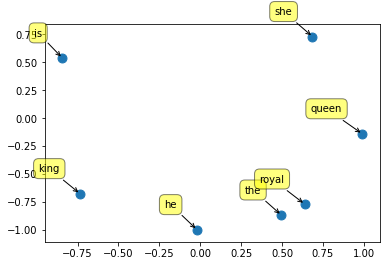

In [120]:

sizes = 80
plt.scatter(vectors[:, 0], vectors[:, 1], s=sizes)
for word in words:
    label, x, y = word, vectors[word2int[word]][0],vectors[word2int[word]][1]
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

##  Where do we go from here

Next notebook where we have trained the model on a larger corpus : text8.
Also we have used tf based APIs extensively for training the word-2-vec model.